# Abstract

In this project, we delve deep into the thriving sector of __online retail__ by analyzing a __transactional dataset__ from a UK-based retailer, available at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/352/online+retail). This dataset documents all transactions between 2010 and 2011. Our primary objective is to amplify the efficiency of marketing strategies and boost sales through __customer segmentation__. We aim to transform the transactional data into a customer-centric dataset by creating new features that will facilitate the segmentation of customers into distinct groups using the __K-means clustering__ algorithm. This segmentation will allow us to understand the distinct __profiles__ and preferences of different customer groups

Customer segmentation is a vital strategy for businesses seeking to tailor their marketing efforts and enhance customer satisfaction. By dividing customers into distinct groups based on shared characteristics, such as purchasing behavior, demographics, or preferences, businesses can better understand and meet the unique needs of each segment. This project explores the process of customer segmentation and its significance in modern marketing. Through the application of data analysis techniques, including RFM (Recency, Frequency, Monetary) analysis and clustering algorithms such as K-means, businesses can identify meaningful customer segments and develop targeted marketing strategies to improve customer acquisition, retention, and loyalty.

# Introduction

This notebook aims at analyzing the content of an E-commerce database that lists purchases made by  ∼
 4000 customers over a period of one year (from 2010/12/01 to 2011/12/09).

# Why Customer Segmentation is needed?

**Targeted Marketing:** By segmenting customers based on their characteristics and behavior, businesses can tailor their marketing efforts to specific groups. This allows for more targeted and personalized marketing messages, products, and services, which are more likely to resonate with the needs and preferences of each segment.

**Improved Customer Experience:** Understanding different customer segments enables businesses to provide a more customized and relevant experience for each group. This can lead to higher levels of customer satisfaction, loyalty, and retention, as customers feel understood and valued by the business.

**Increased Sales and Revenue:** Targeted marketing efforts can lead to higher conversion rates and increased sales. By focusing on segments with higher potential for purchasing specific products or services, businesses can maximize the return on their marketing investments and drive revenue growth.

**Optimized Resource Allocation:** Customer segmentation helps businesses allocate their resources (such as marketing budget, time, and personnel) more efficiently. By prioritizing segments with the highest potential value or growth opportunities, businesses can optimize their marketing strategies and improve overall performance.

**Competitive Advantage:** Customer segmentation can provide businesses with insights into niche markets or unmet needs that competitors may have overlooked. By effectively targeting these segments, businesses can gain a competitive advantage and differentiate themselves in the marketplace.

**Product Development and Innovation:** Understanding the unique needs and preferences of different customer segments can inform product development and innovation efforts. By identifying gaps in the market or areas where existing products or services can be improved, businesses can develop offerings that better meet the needs of their target customers.

# Objectives

**Data Cleaning & Transformation**: Clean the dataset by handling missing values, duplicates, and outliers, preparing it for effective clustering.

    
**Feature Engineering**: Develop new features based on the transactional data to create a customer-centric dataset, setting the foundation for customer segmentation.  

    
**Data Preprocessing**: Undertake feature scaling and dimensionality reduction to streamline the data, enhancing the efficiency of the clustering process.  

    
**Customer Segmentation using K-Means Clustering**: Segment customers into distinct groups using K-means, facilitating targeted marketing and personalized strategies.  

    
**Cluster Analysis & Evaluation**: Analyze and profile each cluster to develop targeted marketing strategies and assess the quality of the clusters formed.


# Importing Required Libraries 
Numpy For linear algebra |
Pandas For Data processing, CSV file I/O (e.g. pd.read_csv) |
Matplotlib For Data Visualizations

In [1]:

import numpy as np 
import pandas as pd 

import time, warnings
import datetime as dt

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
retail_df = pd.read_csv('retail_Dataset.csv',encoding="ISO-8859-1")
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset consists of 541,909 entries and 8 columns. Here is a brief overview of each column:

- __`InvoiceNo`__: This is an object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.
   
    
- __`StockCode`__: An object data type column representing the product code for each item. 

    
- __`Description`__: This column, also an object data type, contains descriptions of the products. It has some missing values, with 540,455 non-null entries out of 541,909.

    
- __`Quantity`__: This is an integer column indicating the quantity of products purchased in each transaction.
   

- __`InvoiceDate`__: A datetime column that records the date and time of each transaction.

    
- __`UnitPrice`__: A float column representing the unit price of each product.

    
- __`CustomerID`__: A float column that contains the customer ID for each transaction. This column has a significant number of missing values, with only 406,829 non-null entries out of 541,909.

    
- __`Country`__: An object column recording the country where each transaction took place.

From a preliminary overview, it seems that there are missing values in the `Description` and `CustomerID` columns which need to be addressed. The `InvoiceDate` column will be converted to datetime format, which will facilitate further time series analysis. We also observe that a single customer can have multiple transactions as inferred from the repeated `CustomerID` in the initial rows.

The next steps would include deeper data cleaning and preprocessing to handle missing values, potentially erroneous data, and to create new features that can help in achieving the project goals.

# Summary Statistics

In [4]:
retail_df.shape 


(541909, 8)

In [5]:
# Summary statistics for numerical variables
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [6]:
# Summary statistics for categorical variables
retail_df.describe(include='object').T

,count,unique,top,freq
InvoiceNo,541909,25900,573585,1114
StockCode,541909,4070,85123A,2313
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369
InvoiceDate,541909,23260,10/31/2011 14:41,1114
Country,541909,38,United Kingdom,495478


- __`Quantity`__:
   - The average quantity of products in a transaction is approximately 9.55.
   - The quantity has a wide range, with a minimum value of -80995 and a maximum value of 80995. The negative values indicate returned or cancelled orders, which need to be handled appropriately.
   - The standard deviation is quite large, indicating a significant spread in the data. The presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.

    
- __`UnitPrice`__:
   - The average unit price of the products is approximately 4.61.
   - The unit price also shows a wide range, from -11062.06 to 38970, which suggests the presence of errors or noise in the data, as negative prices don't make sense.
   - Similar to the Quantity column, the presence of outliers is indicated by a large difference between the maximum and the 75th percentile values.
 
    
- __`CustomerID`__:
   - There are 406829 non-null entries, indicating missing values in the dataset which need to be addressed.
   - The Customer IDs range from 12346 to 18287, helping in identifying unique customers.

    
- __`InvoiceNo`__:
   - There are 25900 unique invoice numbers, indicating 25900 separate transactions.
   - The most frequent invoice number is 573585, appearing 1114 times, possibly representing a large transaction or an order with multiple items.

    
- __`StockCode`__:
   - There are 4070 unique stock codes representing different products.
   - The most frequent stock code is 85123A, appearing 2313 times in the dataset.

    
- __`Description`__:
   - There are 4223 unique product descriptions.
   - The most frequent product description is "WHITE HANGING HEART T-LIGHT HOLDER", appearing 2369 times.
   - There are some missing values in this column which need to be treated.

    
- __`Country`__:
   - The transactions come from 38 different countries, with a dominant majority of the transactions (approximately 91.4%) originating from the United Kingdom.

# Handling Missing Values

In [7]:
retail_df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

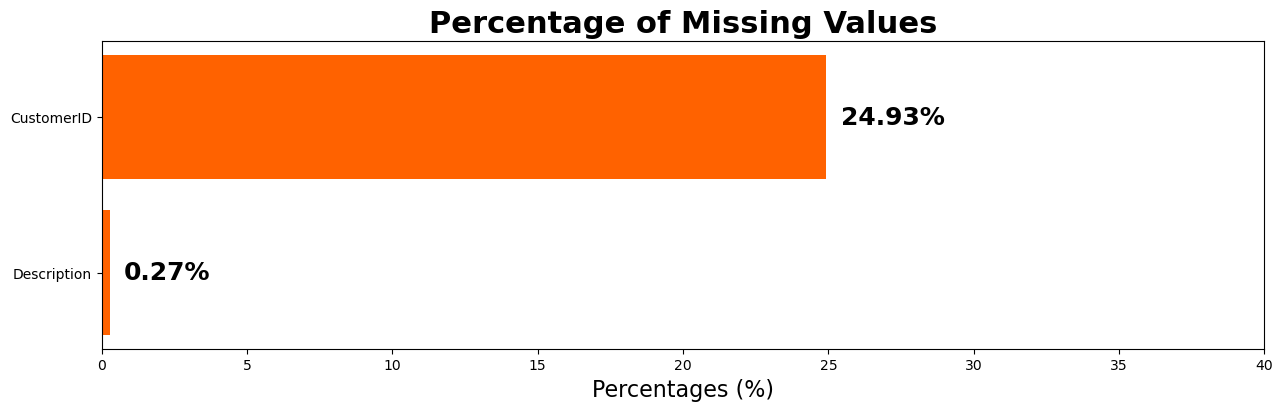

In [8]:
# Calculating the percentage of missing values for each column
missing_data = retail_df.isnull().sum()
missing_percentage = (missing_data[missing_data > 0] / retail_df.shape[0]) * 100

# Prepare values
missing_percentage.sort_values(ascending=True, inplace=True)

# Plot the barh chart
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(missing_percentage.index, missing_percentage, color='#ff6200')

# Annotate the values and indexes
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=18, color='black')

# Set x-axis limit
ax.set_xlim([0, 40])

# Add title and xlabel
plt.title("Percentage of Missing Values", fontweight='bold', fontsize=22)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

__`CustomerID` (24.93% missing values)__
   - The `CustomerID` column contains nearly a quarter of missing data. This column is essential for clustering customers. Imputing such a large percentage of missing values might introduce significant bias or noise into the analysis.
    
   - Moreover, since the clustering is based on customer behavior and preferences, it's crucial to have accurate data on customer identifiers. Therefore, removing the rows with missing `CustomerID`s seems to be the most reasonable approach to maintain the integrity of the clusters and the analysis.

    
- __`Description` (0.27% missing values)__
   - The `Description` column has a minor percentage of missing values. However, it has been noticed that there are inconsistencies in the data where the same `StockCode` does not always have the same `Description`. This indicates data quality issues and potential errors in the product descriptions.
    
   - Given these inconsistencies, imputing the missing descriptions based on `StockCode` might not be reliable. Moreover, since the missing percentage is quite low, it would be prudent to remove the rows with missing `Description`s to avoid propagating errors and inconsistencies into the subsequent analyses.
   
By removing rows with missing values in the `CustomerID` and `Description` columns, we aim to construct a cleaner and more reliable dataset, which is essential for achieving accurate clustering.


In [9]:
# Extracting rows with missing values in 'CustomerID' or 'Description' columns
retail_df[retail_df['CustomerID'].isnull() | retail_df['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [10]:
# Removing rows with missing values in 'CustomerID' and 'Description' columns
retail_df = retail_df.dropna(subset=['CustomerID', 'Description'])

In [11]:
retail_df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [12]:
retail_df.shape

(406829, 8)

# Handling Duplicates

In [13]:
# Finding duplicate rows (keeping all instances)
duplicate_rows = retail_df[retail_df.duplicated(keep=False)]

# Sorting the data by certain columns to see the duplicate rows next to each other
duplicate_rows_sorted = duplicate_rows.sort_values(by=['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Quantity'])

# Displaying the first 10 records
duplicate_rows_sorted.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
494,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/2010 11:45,1.25,17908.0,United Kingdom
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/2010 11:45,4.95,17908.0,United Kingdom
489,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/2010 11:45,2.10,17908.0,United Kingdom
521,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/2010 11:45,2.95,17908.0,United Kingdom
578,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom
598,536412,21448,12 DAISY PEGS IN WOOD BOX,1,12/1/2010 11:49,1.65,17920.0,United Kingdom


In the context of this project, the presence of completely identical rows, including identical transaction times, suggests that these might be data recording errors rather than genuine repeated transactions. Keeping these duplicate rows can introduce noise and potential inaccuracies in the clustering and recommendation system. 

Therefore, I am going to remove these completely identical duplicate rows from the dataset. Removing these rows will help in achieving a cleaner dataset, which in turn would aid in building more accurate customer clusters based on their unique purchasing behaviors. 

In [14]:
# Displaying the number of duplicate rows
print(f"The dataset contains {retail_df.duplicated().sum()} duplicate rows that need to be removed.")

# Removing duplicate rows
retail_df.drop_duplicates(inplace=True)

The dataset contains 5225 duplicate rows that need to be removed.


In [15]:
# Getting the number of rows in the dataframe
retail_df.shape[0]

401604

# Handling Cancelled Transactions

In [16]:
# Filter out the rows with InvoiceNo starting with "C" and create a new column indicating the transaction status
retail_df['Transaction_Status'] = np.where(retail_df['InvoiceNo'].astype(str).str.startswith('C'), 'Cancelled', 'Completed')

# Analyze the characteristics of these rows (considering the new column)
cancelled_transactions = retail_df[retail_df['Transaction_Status'] == 'Cancelled']
cancelled_transactions.describe().drop('CustomerID', axis=1)

,Quantity,UnitPrice
count,8872.000000,8872.000000
mean,-30.774910,18.899512
std,1172.249902,445.190864
min,-80995.000000,0.010000
25%,-6.000000,1.450000
50%,-2.000000,2.950000
75%,-1.000000,4.950000
max,-1.000000,38970.000000


All quantities in the cancelled transactions are negative, indicating that these are indeed orders that were cancelled.
    
    
- The `UnitPrice` column has a considerable spread, showing that a variety of products, from low to high value, were part of the cancelled transactions.



Considering the project's objective to cluster customers based on their purchasing behavior and preferences, it's imperative to understand the cancellation patterns of customers. Therefore, the strategy is to retain these cancelled transactions in the dataset, marking them distinctly to facilitate further analysis. This approach will:

- Enhance the clustering process by incorporating patterns and trends observed in cancellation data, which might represent certain customer behaviors or preferences.
    


In [17]:
# Finding the percentage of cancelled transactions
cancelled_percentage = (cancelled_transactions.shape[0] / retail_df.shape[0]) * 100

# Printing the percentage of cancelled transactions
print(f"The percentage of cancelled transactions in the dataset is: {cancelled_percentage:.2f}%")

The percentage of cancelled transactions in the dataset is: 2.21%


# Stock Code 

In [18]:
# Finding the number of unique stock codes
unique_stock_codes = retail_df['StockCode'].nunique()

# Printing the number of unique stock codes
print(f"The number of unique stock codes in the dataset is: {unique_stock_codes}")

The number of unique stock codes in the dataset is: 3684


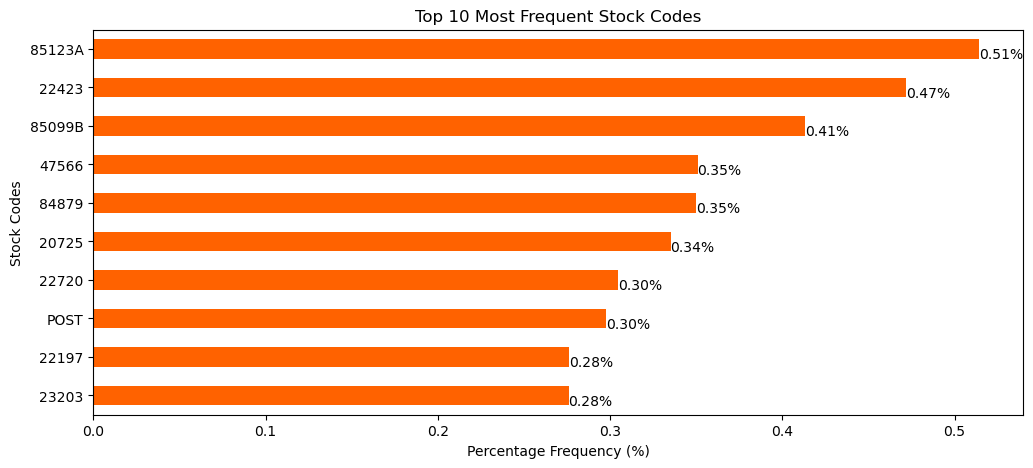

In [19]:
# Finding the top 10 most frequent stock codes
top_10_stock_codes = retail_df['StockCode'].value_counts(normalize=True).head(10) * 100

# Plotting the top 10 most frequent stock codes
plt.figure(figsize=(12, 5))
top_10_stock_codes.plot(kind='barh', color='#ff6200')

# Adding the percentage frequency on the bars
for index, value in enumerate(top_10_stock_codes):
    plt.text(value, index+0.25, f'{value:.2f}%', fontsize=10)

plt.title('Top 10 Most Frequent Stock Codes')
plt.xlabel('Percentage Frequency (%)')
plt.ylabel('Stock Codes')
plt.gca().invert_yaxis()
plt.show()

__Product Variety__: The dataset contains 3684 unique stock codes, indicating a substantial variety of products available in the online retail store. This diversity can potentially lead to the identification of distinct customer clusters, with preferences for different types of products.

    
- __Popular Items__: A closer look at the top 10 most frequent stock codes can offer insights into the popular products or categories that are frequently purchased by customers.

    
- __Stock Code Anomalies__: We observe that while most stock codes are composed of 5 or 6 characters, there are some anomalies like the code '__POST__'. These anomalies might represent services or non-product transactions (perhaps postage fees) rather than actual products. To maintain the focus of the project, which is clustering based on product purchases and creating a recommendation system, these anomalies should be further investigated and possibly treated appropriately to ensure data integrity.

In [20]:
# Finding the number of numeric characters in each unique stock code
unique_stock_codes = retail_df['StockCode'].unique()
numeric_char_counts_in_unique_codes = pd.Series(unique_stock_codes).apply(lambda x: sum(c.isdigit() for c in str(x))).value_counts()

# Printing the value counts for unique stock codes
print("Value counts of numeric character frequencies in unique stock codes:")
print("-"*70)
print(numeric_char_counts_in_unique_codes)

Value counts of numeric character frequencies in unique stock codes:
----------------------------------------------------------------------
5    3676
0       7
1       1
Name: count, dtype: int64


The output indicates the following:

- A majority of the unique stock codes (3676 out of 3684) contain exactly 5 numeric characters, which seems to be the standard format for representing product codes in this dataset.

    
- There are a few anomalies: 7 stock codes contain no numeric characters and 1 stock code contains only 1 numeric character. These are clearly deviating from the standard format and need further investigation to understand their nature and whether they represent valid product transactions.

Now, let's identify the stock codes that contain 0 or 1 numeric characters to further understand these anomalies:

In [21]:
# Finding and printing the stock codes with 0 and 1 numeric characters
anomalous_stock_codes = [code for code in unique_stock_codes if sum(c.isdigit() for c in str(code)) in (0, 1)]

# Printing each stock code on a new line
print("Anomalous stock codes:")
print("-"*22)
for code in anomalous_stock_codes:
    print(code)

Anomalous stock codes:
----------------------
POST
D
C2
M
BANK CHARGES
PADS
DOT
CRUK


In [22]:
# Calculating the percentage of records with these stock codes
percentage_anomalous = (retail_df['StockCode'].isin(anomalous_stock_codes).sum() / len(retail_df)) * 100

# Printing the percentage
print(f"The percentage of records with anomalous stock codes in the dataset is: {percentage_anomalous:.2f}%")

The percentage of records with anomalous stock codes in the dataset is: 0.48%


Based on the analysis, we find that a very small proportion of the records, __0.48%__, have anomalous stock codes, which deviate from the typical format observed in the majority of the data. Also, these anomalous codes are just a fraction among all unique stock codes (__only 8 out of 3684__).

These codes seem to represent non-product transactions like "__BANK CHARGES__", "__POST__" (possibly postage fees), etc. Since they do not represent actual products and are a very small proportion of the dataset, including them in the analysis might introduce noise and distort the clustering and recommendation system.

Given the context of the project, where the aim is to cluster customers based on their product purchasing behaviors and develop a product recommendation system, it would be prudent to exclude these records with anomalous stock codes from the dataset. This way, the focus remains strictly on genuine product transactions, which would lead to a more accurate and meaningful analysis.

In [23]:
# Removing rows with anomalous stock codes from the dataset
retail_df = retail_df[~retail_df['StockCode'].isin(anomalous_stock_codes)]

In [24]:
# Getting the number of rows in the dataframe
retail_df.shape[0]

399689

# Description Column

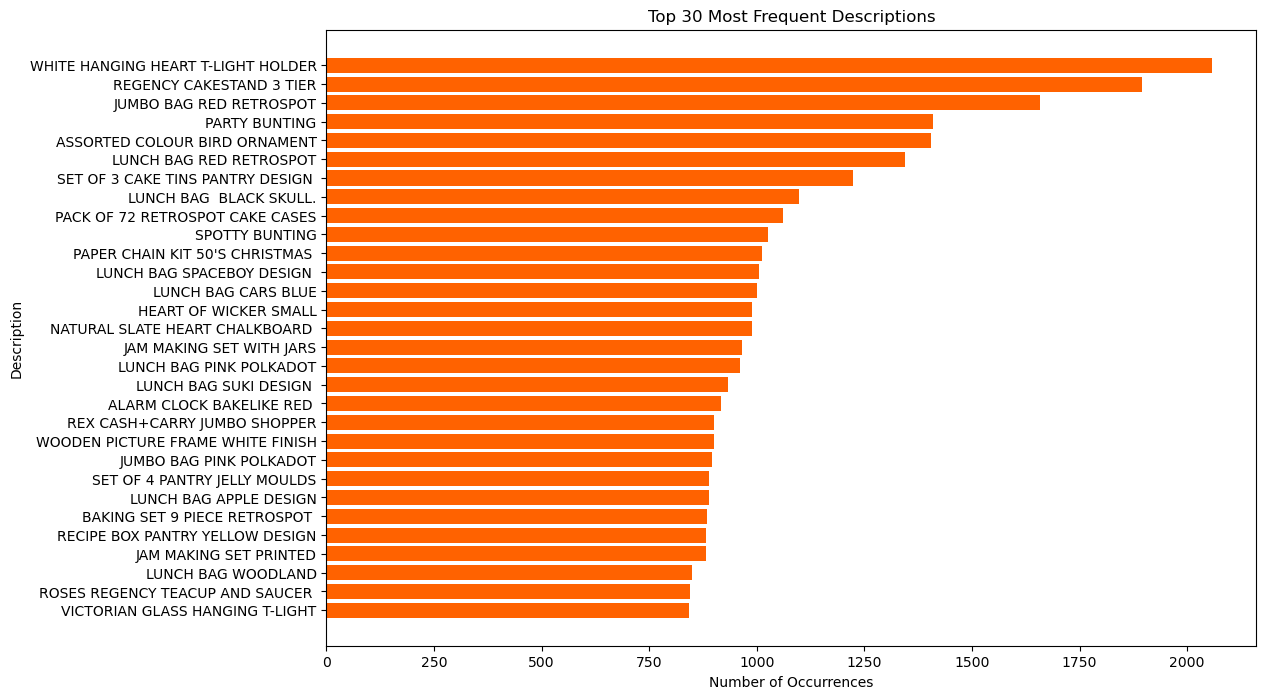

In [25]:
# Calculate the occurrence of each unique description and sort them
description_counts = retail_df['Description'].value_counts()

# Get the top 30 descriptions
top_30_descriptions = description_counts[:30]

# Plotting
plt.figure(figsize=(12,8))
plt.barh(top_30_descriptions.index[::-1], top_30_descriptions.values[::-1], color='#ff6200')

# Adding labels and title
plt.xlabel('Number of Occurrences')
plt.ylabel('Description')
plt.title('Top 30 Most Frequent Descriptions')

# Show the plot
plt.show()

The most frequent descriptions are generally household items, particularly those associated with kitchenware, lunch bags, and decorative items.
       
    
- Interestingly, all the descriptions are in uppercase, which might be a standardized format for entering product descriptions in the database. However, considering the inconsistencies and anomalies encountered in the dataset so far, it would be prudent to check if there are descriptions entered in lowercase or a mix of case styles.

In [26]:
# Find unique descriptions containing lowercase characters
lowercase_descriptions = retail_df['Description'].unique()
lowercase_descriptions = [desc for desc in lowercase_descriptions if any(char.islower() for char in desc)]

# Print the unique descriptions containing lowercase characters
print("The unique descriptions containing lowercase characters are:")
print("-"*60)
for desc in lowercase_descriptions:
    print(desc)

The unique descriptions containing lowercase characters are:
------------------------------------------------------------
BAG 500g SWIRLY MARBLES
POLYESTER FILLER PAD 45x45cm
POLYESTER FILLER PAD 45x30cm
POLYESTER FILLER PAD 40x40cm
FRENCH BLUE METAL DOOR SIGN No
BAG 250g SWIRLY MARBLES
BAG 125g SWIRLY MARBLES
3 TRADITIONAl BISCUIT CUTTERS  SET
NUMBER TILE COTTAGE GARDEN No
FOLK ART GREETING CARD,pack/12
ESSENTIAL BALM 3.5g TIN IN ENVELOPE
POLYESTER FILLER PAD 65CMx65CM
NUMBER TILE VINTAGE FONT No 
POLYESTER FILLER PAD 30CMx30CM
POLYESTER FILLER PAD 60x40cm
FLOWERS HANDBAG blue and orange
Next Day Carriage
THE KING GIFT BAG 25x24x12cm
High Resolution Image


 Upon reviewing the descriptions that contain lowercase characters, it is evident that some entries are not product descriptions, such as "__Next Day Carriage__" and "__High Resolution Image__". These entries seem to be unrelated to the actual products and might represent other types of information or service details.

Step 1: Remove the rows where the descriptions contain service-related information like "Next Day Carriage" and "High Resolution Image", as these do not represent actual products and would not contribute to the clustering and recommendation system we aim to build.

Step 2: For the remaining descriptions with mixed case, standardize the text to uppercase to maintain uniformity across the dataset. This will also assist in reducing the chances of having duplicate entries with different case styles.

By implementing the above strategy, we can enhance the quality of our dataset, making it more suitable for the analysis and modeling phases of our project.

In [27]:
service_related_descriptions = ["Next Day Carriage", "High Resolution Image"]

# Calculate the percentage of records with service-related descriptions
service_related_percentage = retail_df[retail_df['Description'].isin(service_related_descriptions)].shape[0] / retail_df.shape[0] * 100

# Print the percentage of records with service-related descriptions
print(f"The percentage of records with service-related descriptions in the dataset is: {service_related_percentage:.2f}%")

# Remove rows with service-related information in the description
retail_df = retail_df[~retail_df['Description'].isin(service_related_descriptions)]

# Standardize the text to uppercase to maintain uniformity across the dataset
retail_df['Description'] = retail_df['Description'].str.upper()

The percentage of records with service-related descriptions in the dataset is: 0.02%


In [28]:
# Getting the number of rows in the dataframe
retail_df.shape[0]

399606

# Unit Price

In [29]:
retail_df['UnitPrice'].describe()

count    399606.000000
mean          2.904957
std           4.448796
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max         649.500000
Name: UnitPrice, dtype: float64

The minimum unit price value is zero. This suggests that there are some transactions where the unit price is zero, potentially indicating a free item or a data entry error. To understand their nature, it is essential to investigate these zero unit price transactions further. A detailed analysis of the product descriptions associated with zero unit prices will be conducted to determine if they adhere to a specific pattern:

In [30]:
retail_df[retail_df['UnitPrice']==0].describe()[['Quantity']]

,Quantity
count,33.000000
mean,420.515152
std,2176.713608
min,1.000000
25%,2.000000
50%,11.000000
75%,36.000000
max,12540.000000


The transactions with a unit price of zero are relatively few in number (33 transactions).
    
    
- These transactions have a large variability in the quantity of items involved, ranging from 1 to 12540, with a substantial standard deviation.
    
    
- Including these transactions in the clustering analysis might introduce noise and could potentially distort the customer behavior patterns identified by the clustering algorithm.


Given the small number of these transactions and their potential to introduce noise in the data analysis, the strategy should be to remove these transactions from the dataset. This would help in maintaining a cleaner and more consistent dataset, which is essential for building an accurate and reliable clustering model and recommendation system.

In [31]:
# Removing records with a unit price of zero to avoid potential data entry errors
retail_df = retail_df[retail_df['UnitPrice'] > 0]

In [32]:
retail_df.reset_index(drop=True, inplace=True)

In [33]:
retail_df.shape[0]

399573

# Feature Engineering


RFM is a method used for analyzing customer value and segmenting the customer base. It is an acronym that stands for:

- __Recency (R):__ This metric indicates how recently a customer has made a purchase. A lower recency value means the customer has purchased more recently, indicating higher engagement with the brand.

    
- __Frequency (F):__ This metric signifies how often a customer makes a purchase within a certain period. A higher frequency value indicates a customer who interacts with the business more often, suggesting higher loyalty or satisfaction.

    
- __Monetary (M):__ This metric represents the total amount of money a customer has spent over a certain period. Customers who have a higher monetary value have contributed more to the business, indicating their potential high lifetime value.

    
Together, these metrics help in understanding a customer's buying behavior and preferences, which is pivotal in personalizing marketing strategies and creating a recommendation system.

### Creating a new column "Amount" by multiplying "Quantity" and "Unit Price"



In [34]:
retail_df["Amount"]= retail_df["Quantity"]*retail_df["UnitPrice"]
retail_df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed,20.34
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,Completed,15.30
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,Completed,25.50
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,Completed,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,Completed,11.10
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom,Completed,54.08


### Converting a column's datatype to datetime



In [35]:
retail_df["InvoiceDate"] = pd.to_datetime(retail_df["InvoiceDate"])
retail_df.dtypes


InvoiceNo                     object
StockCode                     object
Description                   object
Quantity                       int64
InvoiceDate           datetime64[ns]
UnitPrice                    float64
CustomerID                   float64
Country                       object
Transaction_Status            object
Amount                       float64
dtype: object

In [36]:
retail_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34


### Country Wise Data

In [37]:
retail_df.Country.value_counts(normalize=True) 

Country
United Kingdom          0.890971
Germany                 0.022722
France                  0.020402
EIRE                    0.018440
Spain                   0.006162
Netherlands             0.005821
Belgium                 0.004933
Switzerland             0.004612
Portugal                0.003571
Australia               0.003136
Norway                  0.002650
Italy                   0.001960
Channel Islands         0.001882
Finland                 0.001634
Cyprus                  0.001522
Sweden                  0.001091
Austria                 0.000969
Denmark                 0.000939
Japan                   0.000888
Poland                  0.000841
USA                     0.000728
Israel                  0.000618
Unspecified             0.000603
Singapore               0.000538
Iceland                 0.000455
Canada                  0.000375
Greece                  0.000355
Malta                   0.000308
United Arab Emirates    0.000168
European Community      0.000145
RS

In [38]:
retail_df[retail_df["Country"]=="United Kingdom"].CustomerID.nunique() / retail_df.CustomerID.nunique() 


0.9037138927097662

In [39]:
retail_df.shape

(399573, 10)

**90% of the customers are from UK**

### Forming a sub-sample which includes only the customers from UK



In [40]:
retail_uk = retail_df[retail_df['Country']=='United Kingdom']
retail_uk.shape

(356008, 10)

### Average total quantity ordered by a customer

In [41]:
np.mean(retail_uk.groupby("CustomerID").Quantity.sum())

1009.5854895991882

### Average total amount spent by a customer



In [42]:
np.mean(retail_uk.groupby("CustomerID").Amount.sum())

1725.3517453069508

### Exploring the unique values of each attribute



In [43]:
print("Summary: ")
print("Number of products bought: ",retail_uk['StockCode'].nunique())
print("Number of customers:", retail_uk['CustomerID'].nunique() )
print("Average quantity of product purchased by a customer: ", round(np.mean(retail_uk.groupby("CustomerID").Quantity.sum()), 0))
print("Average revenue generated per customer: ", round(np.mean(retail_uk.groupby("CustomerID").Amount.sum()), 2))
print("Average product quantity sold per transaction: ", round(retail_uk.Quantity.mean(), 0))
print("Average revenue generated per transaction: ", round(retail_uk.Amount.mean(), 2) )

Summary: 
Number of products bought:  3651
Number of customers: 3942
Average quantity of product purchased by a customer:  1010.0
Average revenue generated per customer:  1725.35
Average product quantity sold per transaction:  11.0
Average revenue generated per transaction:  19.1


Number of Products Bought: The fact that there are 3,936 different products bought suggests diversity in the product offerings. This could indicate a wide range of choices for customers or a diverse product line.

Number of Customers: You have 3,921 customers. This number represents the customer base that your business interacts with, and it's essential for understanding customer behavior and preferences.

Average Quantity of Product Purchased by a Customer: The average quantity of products purchased by a customer is 1,089.0. This could indicate either bulk purchases by some customers or a high-frequency of purchases.

Average Revenue Generated per Customer: The average revenue generated per customer is $1,863.91. This indicates the average spending per customer over the period under consideration. It's essential for understanding customer lifetime value and revenue potential.

Average Product Quantity Sold per Transaction: The average quantity of products sold per transaction is 10.0. This gives an indication of the typical size of a transaction, which can be useful for inventory management and understanding customer buying behavior.

Average Revenue Generated per Transaction: The average revenue generated per transaction is $18.51. This metric provides insight into the typical value of a transaction, which is crucial for assessing the financial health of the business.

# Create a new column called date which contains the date of invoice only


In [44]:
retail_uk['date'] = pd.DatetimeIndex(retail_uk['InvoiceDate']).date

In [45]:
retail_uk.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction_Status,Amount,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,Completed,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,Completed,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,Completed,20.34,2010-12-01


In [46]:
min(retail_uk['date'])

datetime.date(2010, 12, 1)

In [47]:
max(retail_uk['date'])

datetime.date(2011, 12, 9)

In [48]:
retail_uk['date'] = pd.to_datetime(retail_uk['date'])

In [49]:
retail_uk['date'] = pd.to_datetime(retail_uk['date'])

# Extract month and year from the date column
retail_uk['year_month'] = retail_uk['date'].dt.strftime('%b %Y')

# Group the DataFrame by the 'year_month' column and count the number of transactions in each month-year combination
monthly_transaction_counts = retail_uk.groupby('year_month').size()

# Sort the data month and year-wise
monthly_transaction_counts = monthly_transaction_counts.sort_index()

print("Frequency of transactions in each month and year (sorted):")
print(monthly_transaction_counts)

Frequency of transactions in each month and year (sorted):
year_month
Apr 2011    21109
Aug 2011    23353
Dec 2010    23998
Dec 2011    15771
Feb 2011    17859
Jan 2011    18471
Jul 2011    23857
Jun 2011    23994
Mar 2011    24230
May 2011    25451
Nov 2011    58234
Oct 2011    43790
Sep 2011    35891
dtype: int64


We can see that in nov the amount of orders has been the highest



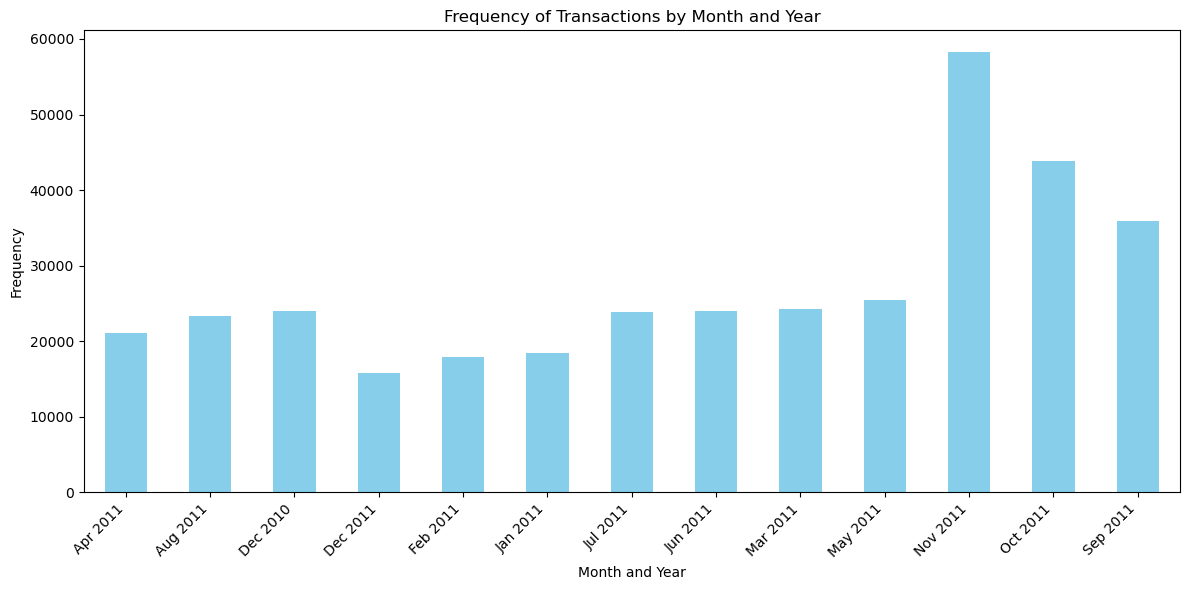

In [50]:
plt.figure(figsize=(12, 6))
monthly_transaction_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Transactions by Month and Year')
plt.xlabel('Month and Year')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# CREATING RECENCY DATAFRAME
group by customers and check the last date of purchase

In [51]:

recency_df = retail_uk.groupby(by='CustomerID', as_index=False)['date'].max()
recency_df.columns = ['CustomerID','LastPurshaceDate']
recency_df.head(20)


,CustomerID,LastPurshaceDate
0,12346.0,2011-01-18
1,12747.0,2011-12-07
2,12748.0,2011-12-09
3,12749.0,2011-12-06
4,12820.0,2011-12-06
5,12821.0,2011-05-09
6,12822.0,2011-09-30
7,12823.0,2011-09-26
8,12824.0,2011-10-11
9,12826.0,2011-12-07


# Calculating recency

In [52]:
now = dt.date(2011,12,9)
now = pd.Timestamp('2011-12-9')

# Calculate recency in days
recency_df['Recency'] = (now - recency_df['LastPurshaceDate']).dt.days

# Print the DataFrame to verify the result
print(recency_df)



      CustomerID LastPurshaceDate  Recency
0        12346.0       2011-01-18      325
1        12747.0       2011-12-07        2
2        12748.0       2011-12-09        0
3        12749.0       2011-12-06        3
4        12820.0       2011-12-06        3
...          ...              ...      ...
3937     18280.0       2011-03-07      277
3938     18281.0       2011-06-12      180
3939     18282.0       2011-12-02        7
3940     18283.0       2011-12-06        3
3941     18287.0       2011-10-28       42

[3942 rows x 3 columns]


In [53]:
recency_df.head()

,CustomerID,LastPurshaceDate,Recency
0,12346.0,2011-01-18,325
1,12747.0,2011-12-07,2
2,12748.0,2011-12-09,0
3,12749.0,2011-12-06,3
4,12820.0,2011-12-06,3


This calculation will result in the 'Recency' column containing the number of days between the last purchase date for each customer and December 9, 2011 (the now date). This metric represents how recent each customer's last purchase was relative to the specified date.

### Droping LastPurchaseDate as it is not needed anymore


In [54]:
recency_df.drop('LastPurshaceDate',axis=1,inplace=True)

### CREATING FREQUENCY DATAFRAME


In [55]:
retail_uk.shape

(356008, 12)

In [56]:
frequency_df = retail_uk.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

,CustomerID,Frequency
0,12346.0,2
1,12747.0,103
2,12748.0,4440
3,12749.0,230
4,12820.0,59


In [57]:
retail_uk.info()


<class 'pandas.core.frame.DataFrame'>
Index: 356008 entries, 0 to 399557
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   InvoiceNo           356008 non-null  object        
 1   StockCode           356008 non-null  object        
 2   Description         356008 non-null  object        
 3   Quantity            356008 non-null  int64         
 4   InvoiceDate         356008 non-null  datetime64[ns]
 5   UnitPrice           356008 non-null  float64       
 6   CustomerID          356008 non-null  float64       
 7   Country             356008 non-null  object        
 8   Transaction_Status  356008 non-null  object        
 9   Amount              356008 non-null  float64       
 10  date                356008 non-null  datetime64[ns]
 11  year_month          356008 non-null  object        
dtypes: datetime64[ns](2), float64(3), int64(1), object(6)
memory usage: 35.3+ MB


### Amount spent by each individual customer

In [58]:
monetary_df = retail_uk.groupby(by='CustomerID',as_index=False)['Amount'].sum()
monetary_df.columns = ['CustomerID','Monetary']
monetary_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12747.0,4196.01
2,12748.0,29819.99
3,12749.0,3818.20
4,12820.0,942.34


### RFM TABLE

merging recency dataframe with frequency dataframe, resulting a temporary dataframe

In [59]:
# Convert 'CustomerID' column in frequency_df to float64
frequency_df['CustomerID'] = frequency_df['CustomerID'].astype(float)

# Merge the DataFrames
temp_df = recency_df.merge(frequency_df, on='CustomerID')

temp_df

,CustomerID,Recency,Frequency
0,12346.0,325,2
1,12747.0,2,103
2,12748.0,0,4440
3,12749.0,3,230
4,12820.0,3,59
...,...,...,...
3937,18280.0,277,10
3938,18281.0,180,7
3939,18282.0,7,13
3940,18283.0,3,719


### Merging with monetary dataframe to get a table with the 3 columns



In [60]:
rfm_df = temp_df.merge(monetary_df,on='CustomerID')
rfm_df

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12747.0,2,103,4196.01
2,12748.0,0,4440,29819.99
3,12749.0,3,230,3818.20
4,12820.0,3,59,942.34
...,...,...,...,...
3937,18280.0,277,10,180.60
3938,18281.0,180,7,80.82
3939,18282.0,7,13,176.60
3940,18283.0,3,719,2039.58
